In [115]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [116]:
df = pd.read_csv("train.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [117]:
x = df.drop(columns='SalePrice')
y = df['SalePrice']
num_cols = x.select_dtypes(include=["number"]).columns
cat_col = x.select_dtypes(include=['object']).columns

In [118]:
# sns.boxplot(df['LotFrontage'])

In [119]:
for i in num_cols:
    if df[i].isnull().any():
        print(i)

LotFrontage
MasVnrArea
GarageYrBlt


Too many outliers in LotFrontage

In [120]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())

df['Alley'],df['MasVnrType'],df['BsmtQual'],df['BsmtCond'],df['BsmtExposure'],df['BsmtFinType1'],df['BsmtFinType2'],df['FireplaceQu'],df['GarageType'],df['GarageYrBlt'],df['GarageFinish'],df['GarageQual'],df['GarageCond'],df['PoolQC'],df['Fence'],df['MiscFeature']

Columns with null values

In [121]:
# sns.boxplot(df['MasVnrArea'])

Too many outliers

In [122]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median())

In [123]:
df['Electrical'] = df['Electrical'].replace({None:df['Electrical'].mode})

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [125]:
null_cols = []
for c in df.columns:
    if df[c].isnull().any():
        null_cols.append(c)

In [126]:
numprocessor = Pipeline(
    steps=[
        ("num_imputer",SimpleImputer(strategy='most_frequent')),
        ("num_scaler",StandardScaler())
    ]
)

In [127]:
cat_processor = Pipeline(
    steps=[
        ("cat_imputer",SimpleImputer(strategy="constant",fill_value="NA")),
        ("cat_encoder",OneHotEncoder(sparse_output=False))
    ]
)

In [128]:
preprocessing = ColumnTransformer(
    transformers=[
        ("numprocessor",numprocessor,num_cols),
        ("cat_processor",cat_processor,cat_col)
    ]
)

In [139]:
model = Pipeline(
    steps=[
        ('preprocessing',preprocessing),
        ("random_forrest",RandomForestRegressor(n_estimators=200,random_state=42))
    ]
)
model.fit(x,y)
# param = {
#     "criterion": ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
#     "max_depth": [10,30,50,70,100],
#     "min_samples_split": [2,3,5,7],
#     "min_samples_leaf": [1,2,3,4,5],
# }

,steps,"[('preprocessing', ...), ('random_forrest', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('numprocessor', ...), ('cat_processor', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [130]:
model.score(x,y)

0.980885319623073

In [131]:
test_df = pd.read_csv("test.csv")
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [132]:
test_num_cols = test_df.select_dtypes(include=['number']).columns
test_cat_cols = test_df.select_dtypes(include=['object']).columns


In [133]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

train_df['MSZoning'],

LotFrontage
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
BsmtFullBath
BsmtHalfBath
GarageYrBlt
GarageCars
GarageArea


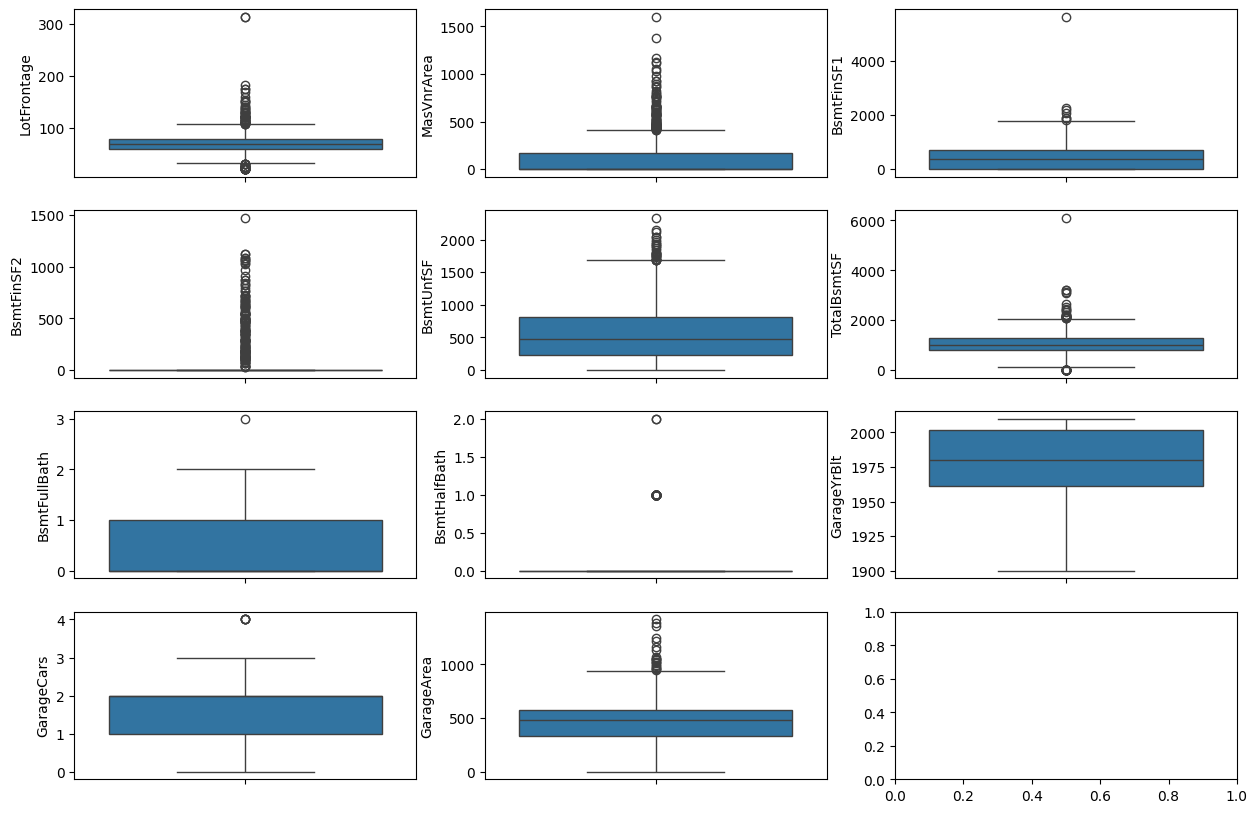

In [140]:
for i in test_num_cols:
    if test_df[i].isnull().any():
        print(i)
fig,axis = plt.subplots(4,3,figsize=(15,10))
s1 = sns.boxplot(df['LotFrontage'],ax=axis[0][0])
s2 = sns.boxplot(df['MasVnrArea'],ax=axis[0][1])
s3 = sns.boxplot(df['BsmtFinSF1'],ax=axis[0][2])
s4 = sns.boxplot(df['BsmtFinSF2'],ax=axis[1][0])
s5 = sns.boxplot(df['BsmtUnfSF'],ax=axis[1][1])
s6 = sns.boxplot(df['TotalBsmtSF'],ax=axis[1][2])
s7 = sns.boxplot(df['BsmtFullBath'],ax=axis[2][0])
s7 = sns.boxplot(df['BsmtHalfBath'],ax=axis[2][1])
s8 = sns.boxplot(df['GarageYrBlt'],ax=axis[2][2])
s9 = sns.boxplot(df['GarageCars'],ax=axis[3][0])
s10 = sns.boxplot(df['GarageArea'],ax=axis[3][1]) 

[LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,GarageArea] have too many outliers - replace with median

[BsmtFullBath,BsmtHalfBath,GarageYrBlt,GarageCars] have less or no outliers - replace with mean

In [135]:
testcatprocessor = Pipeline(
    steps=[
        ("cat_impute",SimpleImputer(strategy="constant",fill_value="NA")),
        ("act_encode",OneHotEncoder(sparse_output=False)),
    ]
)

In [136]:
test_num_mean_processor = Pipeline(
    steps=[
        ("mean_fill",SimpleImputer(strategy="mean")),
        ("scale",StandardScaler())
    ]
)
test_num_median_processor = Pipeline(
    steps=[
        ("median_fill",SimpleImputer(strategy="median")),
        ("scale",StandardScaler())
    ]
)

In [137]:
test_preprocessing = ColumnTransformer(
    transformers=[
        ("cat_preprocess",testcatprocessor,test_cat_cols),
        ('mean_fill',test_num_mean_processor,['BsmtFullBath','BsmtHalfBath','GarageYrBlt','GarageCars']),
        ("median_fill",test_num_median_processor,['LotFrontage','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','GarageArea'])
    ]
)

In [ ]:
model = Pipeline(
    steps=[
        ("test_preprocessing",test_preprocessing),
        ("model",RandomForestRegressor())
    ]
)
model.fit()

NotFittedError: Pipeline is not fitted yet.